# Classical Mechanics I (PHYS 311)
## Studio 12

*Name:* Connor Haskell

*Date:* 11/23/2024

## Driven Damped Harmonic Oscillators

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Last time you coded up a damped harmonic oscillator system. Let's simplify down to 1D, and now add a driving force.

Code up the differential equation for a 1D harmonic oscillator using `odeint` like we've done a few times in this class. But now include a frictional term **and a driving force $f(t)=f_0 cos(\omega_d t)$**. So your system of first-order ODEs should be:

$$\dot{v}_x = - 2\beta v_x - \omega_0^2 x + f_0 cos(\omega_d t)$$
$$\dot{x} = v_x$$

When you code this up, make $\beta$, $\omega_0$, $\omega_d$, and $f_0$ configurable arguments to your `ode_system` function (the same way we were handing it masses before).

In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def ode_system(inputs,t,B,w0,wd,f0):
    
    [x, vx] = inputs
    
    vxdot = (-2*B*vx)-(w0**2*x)+(f0*np.cos(wd*t))
    xdot = vx
    
    return [xdot, vxdot]

Let's **not** use animations this week **(so you don't need any `plotSomeStuff` function around!)**. Let's just plot the positions as a function of time. Basically, we're making the plots that I tried to (badly) draw on the board.

Plot for times from 0 to 50, in 200 steps. 
Let's use $\beta=0.1$, $\omega_0=10$ (i.e. underdamped!). 
To describe the driving force, use $f_0=1$, $\omega_d=1$ (below the resonance condition). 
Start the system at the equilibrium position $x=0$ with no initial velocity. 

**Comment on the result:** Do you see transients? Do you see a steady state behavior? What's the frequency and amplitude of the steady-state behavior? Roughly how long does it take to get to the steady state?


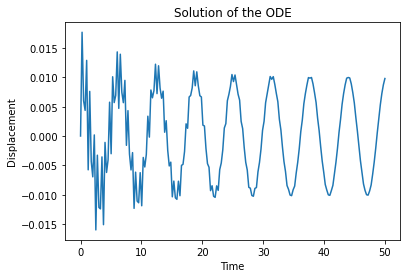

In [4]:
nframes = 200
tmax = 50
t_array = np.linspace(0,tmax,nframes)

initial_conditions = [0,0]
B = 0.1
w0 = 10
f0 = 1
wd = 1

solutions = odeint(ode_system, initial_conditions, t_array, args=(B, w0, wd, f0))

x_array = solutions[:,0]

plot(t_array, x_array)
title('Solution of the ODE')
xlabel('Time')
ylabel('Displacement')
show()

Yes, there are transients at the begining that are a product of the initial disturburances (driving force). After around 30 seconds it comes to a steady state which has an amplitude (A) of about 0.020 and it also has a Period (T) of 6.5 seconds which means the frequency (f) is about 0.154 Hz

Change the starting position to 0.05, with no initial velocity. How long does it take to get to the steady state? Try with starting position of 1.

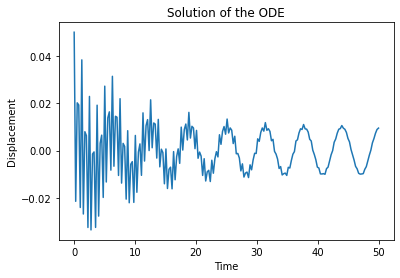

In [5]:
initial_conditions = [0.05,0]
B = 0.1
w0 = 10
f0 = 1
wd = 1

solutions = odeint(ode_system, initial_conditions, t_array, args=(B, w0, wd, f0))

x_array = solutions[:,0]

plot(t_array, x_array)
title('Solution of the ODE')
xlabel('Time')
ylabel('Displacement')
show()

This time it takes ariund 40 seconds to completly come to a steady state.

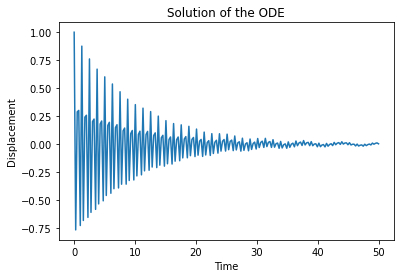

In [7]:
initial_conditions = [1,0]
B = 0.1
w0 = 10
f0 = 1
wd = 1

solutions = odeint(ode_system, initial_conditions, t_array, args=(B, w0, wd, f0))

x_array = solutions[:,0]

plot(t_array, x_array)
title('Solution of the ODE')
xlabel('Time')
ylabel('Displacement')
show()

With the intial position set at x = 1, it seems to never come to a steady state. If it does, it is way to small to tell on the graph.

Now play with the parameters of the driving force. Demonstrate that you get the largest resulting amplitude when you drive an oscillator near its natural frequency by scanning various values of the driving frequencies.

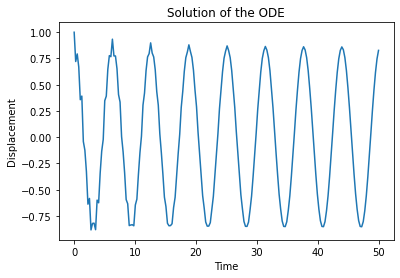

In [8]:
initial_conditions = [1,0]
B = 0.1
w0 = 10
f0 = 85
wd = 1

solutions = odeint(ode_system, initial_conditions, t_array, args=(B, w0, wd, f0))

x_array = solutions[:,0]

plot(t_array, x_array)
title('Solution of the ODE')
xlabel('Time')
ylabel('Displacement')
show()

Plot the original driving force on some plots to compare the phase of the resulting motion. Show that well below resonance, the relative phase is 0, and well above it, the relative phase is $\pi$

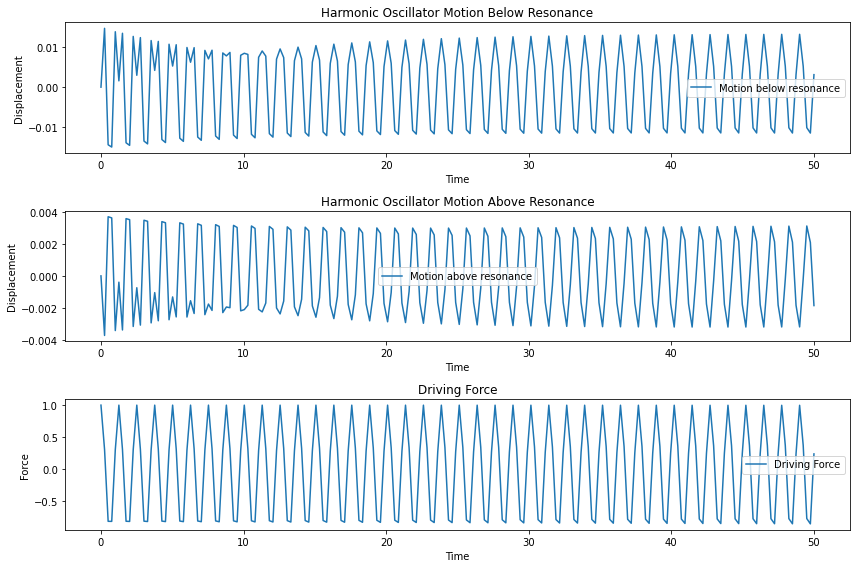

In [9]:
initial_conditions = [0, 0]
B = 0.1
w0 = 10
f0 = 1
wd_below_resonance = 0.5 * w0 
wd_above_resonance = 2 * w0  


solutions_below = odeint(ode_system, initial_conditions, t_array, args=(B, w0, wd_below_resonance, f0))
x_array_below = solutions_below[:, 0]


solutions_above = odeint(ode_system, initial_conditions, t_array, args=(B, w0, wd_above_resonance, f0))
x_array_above = solutions_above[:, 0]


force_array = f0 * np.cos(wd_below_resonance * t_array)


figure(figsize=(12, 8))

subplot(3, 1, 1)
plot(t_array, x_array_below, label='Motion below resonance')
title('Harmonic Oscillator Motion Below Resonance')
xlabel('Time')
ylabel('Displacement')
legend()

subplot(3, 1, 2)
plot(t_array, x_array_above, label='Motion above resonance')
title('Harmonic Oscillator Motion Above Resonance')
xlabel('Time')
ylabel('Displacement')
legend()

subplot(3, 1, 3)
plot(t_array, force_array, label='Driving Force')
title('Driving Force')
xlabel('Time')
ylabel('Force')
legend()

tight_layout()
show()

**EC(+0.5): Figure out a way to calculate the phase offset between the steady-state behavior and the driving force. This will be a little tricky given the transients. Then plot the phase offset as a function of the driving frequency for a given oscillator. Show that when you have a nonzero damping, you get a smooth "turn-on" curve for the transition from $\delta=0$ to $\pi$**